# <span style="color:darkblue"> Lecture 11: Application 1 - Linear Regression </span>

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# <span style="color:darkblue"> I. Import Libraries </span>


In [3]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<font size = "5">

Install the "statsmodels" library
- Run "pip3 install statsmodels" in the terminal
- Automatically included in Anaconda

In [1]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# <span style="color:darkblue"> II. Generate simulated Data </span>

<font size = "5">

Create an empty dataset

In [4]:
dataset = pd.DataFrame([])

<font size = "5">

Create two random variables of size ($n = 50$)

In [5]:
n = 50
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)


<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [6]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [7]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

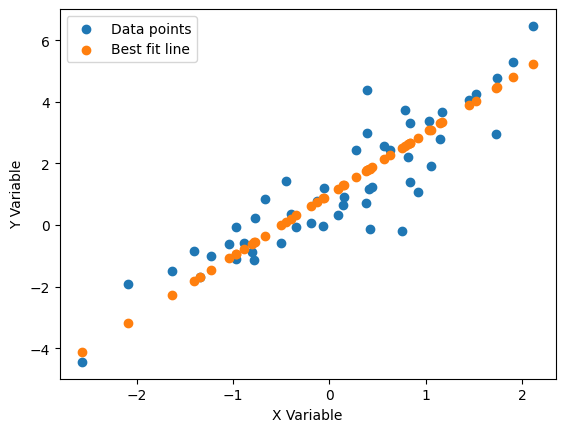

In [8]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.scatter(x = dataset["x"], y = dataset["p"])

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- This subsets records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [9]:
# Write your own code here

subset_above2 = dataset.query("y >= 2")
len_d = len(dataset)
len_s = len(subset_above2)
print(len_s/len_d)

0.34


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [11]:
# Note: abs(...) is the absolute value function
# Write your own code 
ybar = dataset["y"].mean()
stdv_sample = dataset["y"].std()

display(dataset)

subset = dataset.query("abs(y - @ybar) <= @stdv_sample")
display(subset)

,x,e,y,p
0,0.153644,-0.386485,0.920803,1.307288
1,-0.403469,0.157300,0.350361,0.193062
2,0.921040,-1.777068,1.065013,2.842081
3,1.450325,0.147172,4.047821,3.900650
4,-1.040459,0.455128,-0.625789,-1.080917
5,-2.565552,-0.313522,-4.444626,-4.131104
6,0.417614,-1.973929,-0.138700,1.835228
7,-0.447621,1.338237,1.442995,0.104758
8,-0.195763,-0.553167,0.055308,0.608475
9,-1.228958,0.442601,-1.015316,-1.457917


,x,e,y,p
0,0.153644,-0.386485,0.920803,1.307288
1,-0.403469,0.157300,0.350361,0.193062
2,0.921040,-1.777068,1.065013,2.842081
4,-1.040459,0.455128,-0.625789,-1.080917
6,0.417614,-1.973929,-0.138700,1.835228
7,-0.447621,1.338237,1.442995,0.104758
8,-0.195763,-0.553167,0.055308,0.608475
11,-0.973964,0.869240,-0.078687,-0.947927
13,0.633165,0.168312,2.434641,2.266329
14,-0.342898,-0.383762,-0.069559,0.314203


# <span style="color:darkblue"> II. Estimate the best fit line</span>


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [12]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model   = smf.ols(formula = 'y ~  x',data = dataset)
results = model.fit(cov_type = "HC1")

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [13]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.010073
x            1.822225
dtype: float64


<font size = "5">

Plot the best fit line

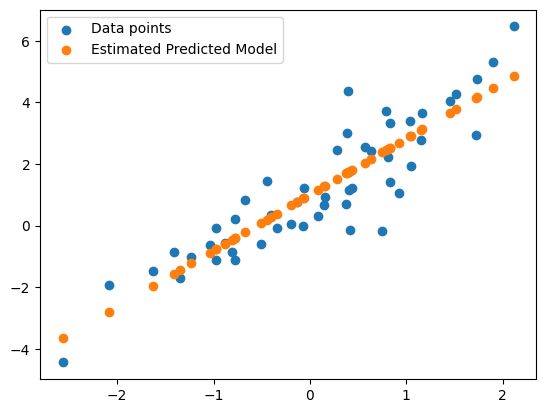

In [14]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.scatter(x = dataset["x"],y = dataset["p_estimated"])

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping scatterplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

In [47]:
# Write your own code


<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error  error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [16]:
# Write your own code
dataset["sample_error"] = dataset["y"] - dataset["p_estimated"]

fn_positive_error = lambda error: error >= 0

dataset["error_status"] = dataset["sample_error"].apply(fn_positive_error)

display(dataset)




,x,e,y,p,p_estimated,sample_error,error_status
0,0.153644,-0.386485,0.920803,1.307288,1.290047,-0.369244,False
1,-0.403469,0.157300,0.350361,0.193062,0.274861,0.075500,True
2,0.921040,-1.777068,1.065013,2.842081,2.688416,-1.623404,False
3,1.450325,0.147172,4.047821,3.900650,3.652892,0.394929,True
4,-1.040459,0.455128,-0.625789,-1.080917,-0.885877,0.260088,True
5,-2.565552,-0.313522,-4.444626,-4.131104,-3.664941,-0.779685,False
6,0.417614,-1.973929,-0.138700,1.835228,1.771060,-1.909761,False
7,-0.447621,1.338237,1.442995,0.104758,0.194407,1.248588,True
8,-0.195763,-0.553167,0.055308,0.608475,0.653350,-0.598042,False
9,-1.228958,0.442601,-1.015316,-1.457917,-1.229366,0.214050,True


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [17]:
# Write your own code
dataset["error_sqr"] = dataset["sample_error"] ** 2
print(dataset["error_sqr"].mean())

0.8968900917542747
